<a href="https://colab.research.google.com/github/Cristalreal/Cristalreal/blob/main/ML_Supervised_methods_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns

dataset = sns.load_dataset('penguins')
dataset.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [ ]:
# Extract the data we need
feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
dataset.dropna(subset=feature_names, inplace=True)

class_names = dataset['species'].unique()

X = dataset[feature_names]

Y = dataset['species']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

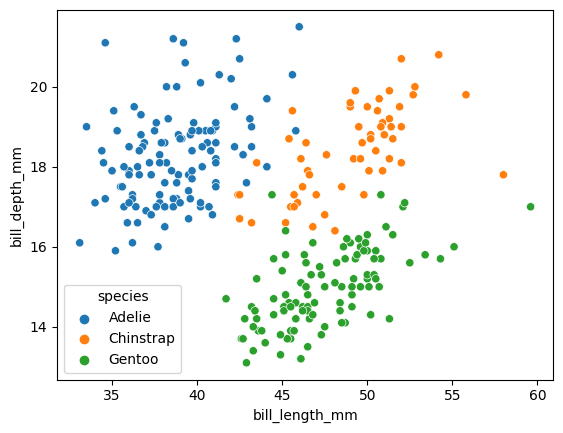

In [ ]:
import matplotlib.pyplot as plt

fig01 = sns.scatterplot(x_train, x=feature_names[0], y=feature_names[1], hue=dataset['species'])
plt.show()

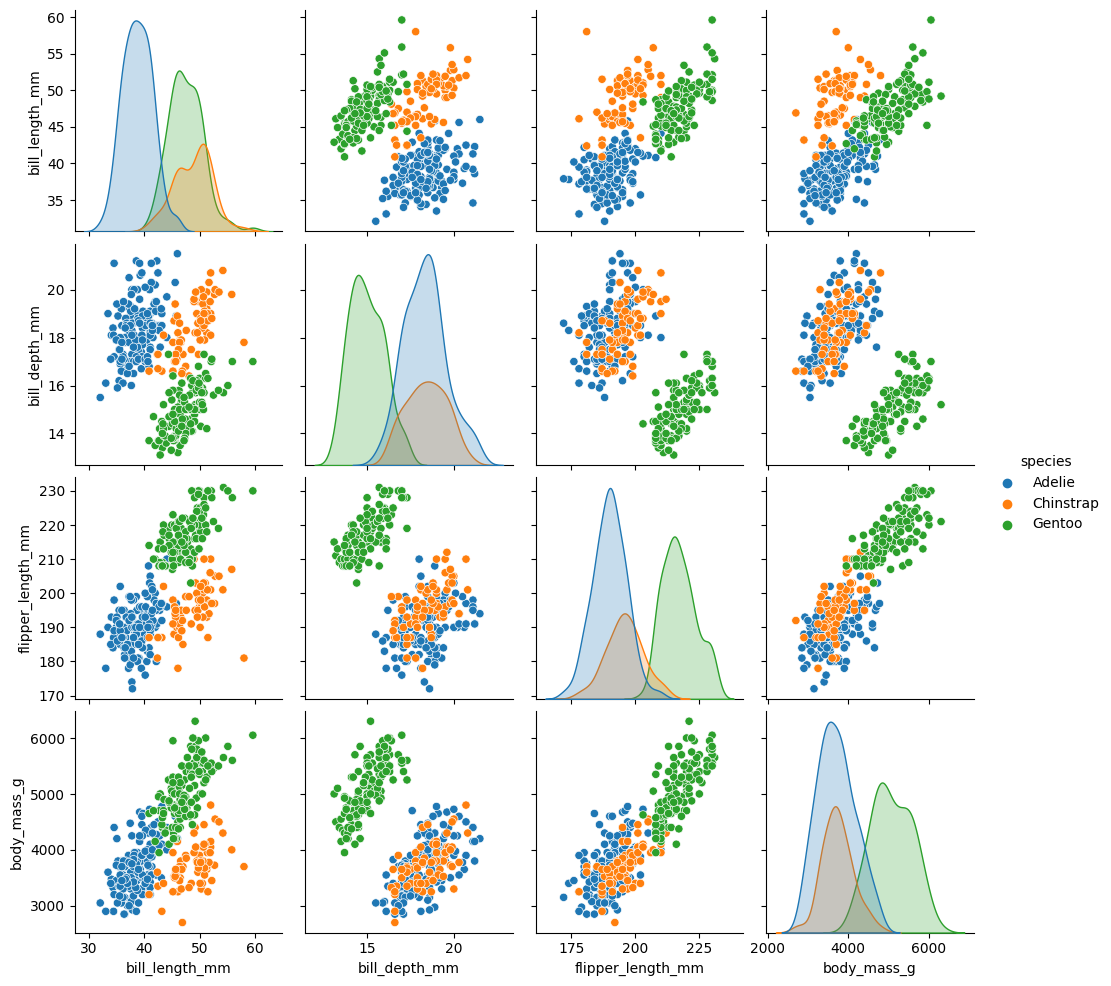

In [ ]:
sns.pairplot(dataset, hue="species")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

clf.predict(x_test)

array(['Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie'], dtype=object)

In [ ]:
clf_score = clf.score(x_test, y_test)

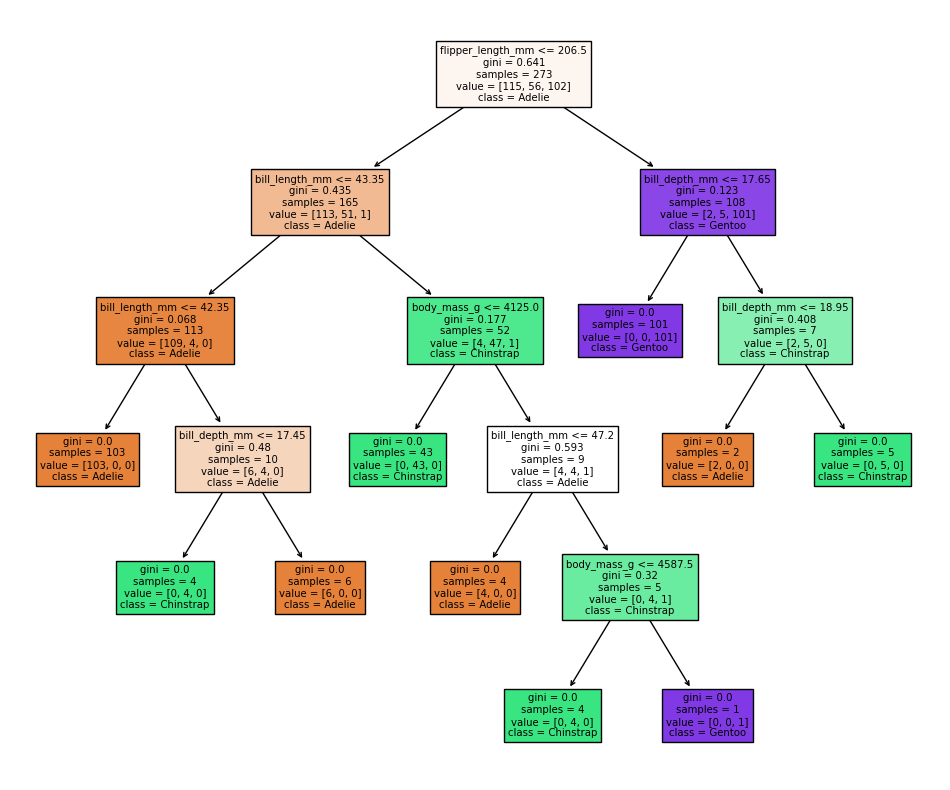

In [ ]:
fig = plt.figure(figsize=(12, 10))
plot_tree(clf, class_names=class_names, feature_names=feature_names, filled=True, ax=fig.gca())
plt.show()

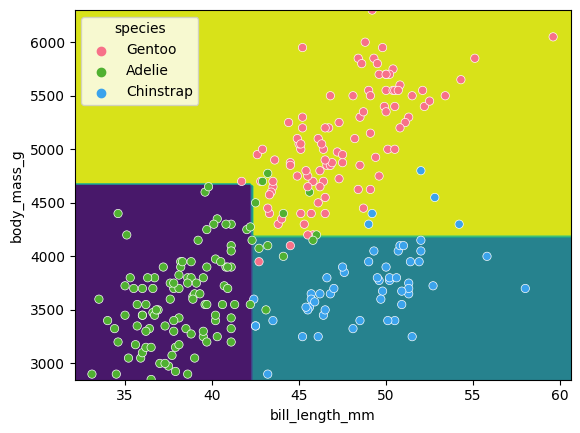

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

f1 = feature_names[0]
f2 = feature_names[3]

clf = DecisionTreeClassifier(max_depth=2) #adding max_depth=2 creates a much simpler parameter space to fit data with less overfitting to individual samples
clf.fit(x_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(clf, x_train[[f1, f2]])

sns.scatterplot(x_train, x=f1, y=f2, hue=y_train, palette="husl")
plt.show()

In [ ]:
from sklearn import preprocessing
import pandas as pd

scalar = preprocessing.StandardScaler()
scalar.fit(x_train)
x_train_scaled = pd.DataFrame(scalar.transform(x_train), columns=x_train.columns, index=x_train.index)
x_test_scaled = pd.DataFrame(scalar.transform(x_test), columns=x_test.columns, index=x_test.index)

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='poly', degree=3, C=1.5)
SVM.fit(x_train_scaled, y_train)

svm_score = SVM.score(x_test_scaled, y_test)
print("Decision tree score is ", clf_score)
print("SVM score is ", svm_score)

Decision tree score is  0.9710144927536232
SVM score is  0.9565217391304348


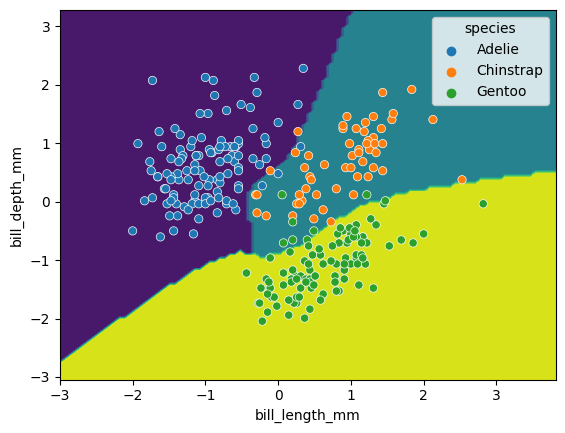

In [ ]:
x2 = x_train_scaled[[feature_names[0], feature_names[1]]]

SVM = svm.SVC(kernel='poly', degree=3, C=1.5)
SVM.fit(x2, y_train)

DecisionBoundaryDisplay.from_estimator(SVM, x2) #, ax=ax
sns.scatterplot(x2, x=feature_names[0], y=feature_names[1], hue=dataset['species'])
plt.show()

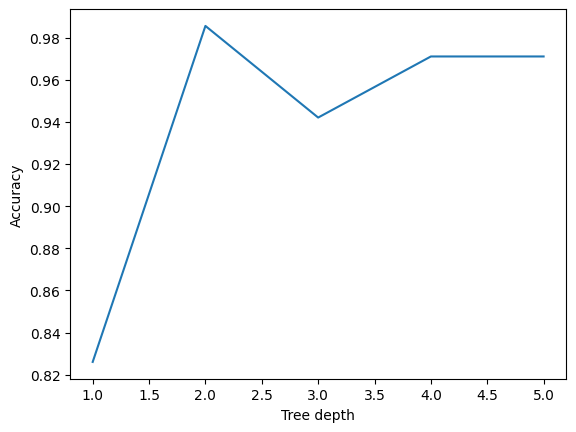

In [ ]:
max_depths = [1, 2, 3, 4, 5]

accuracy = []
for i, d in enumerate(max_depths):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)

    accuracy.append((d, acc))

acc_df = pd.DataFrame(accuracy, columns=['depth', 'accuracy'])

sns.lineplot(acc_df, x='depth', y='accuracy')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.show()

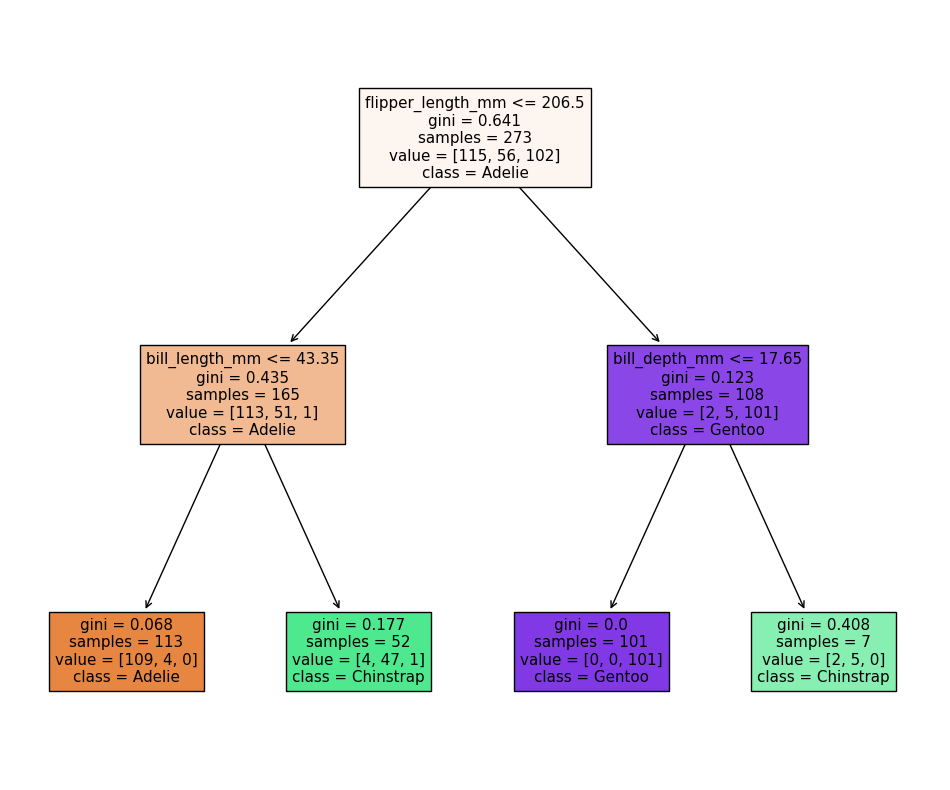

In [ ]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

fig = plt.figure(figsize=(12, 10))
plot_tree(clf, class_names=class_names, feature_names=feature_names, filled=True, ax=fig.gca())
plt.show()

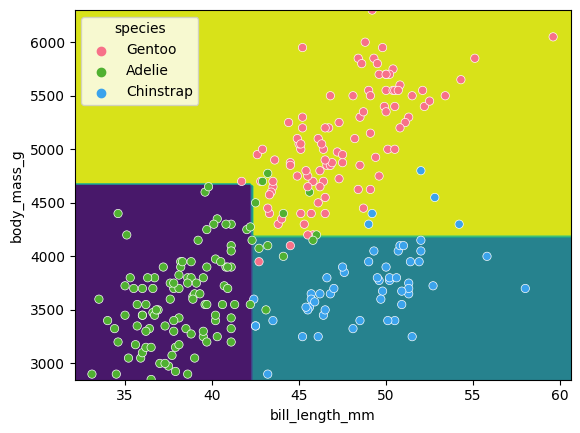

In [ ]:
f1 = feature_names[0]
f2 = feature_names[3]

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(clf, x_train[[f1, f2]])

sns.scatterplot(x_train, x=f1, y=f2, hue=y_train, palette='husl')
plt.show()